In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [12]:
input_path = input("Enter with the input path: ")
output_path = input("Enter with the output path: ")

In [13]:
img = cv2.imread(input_path, 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

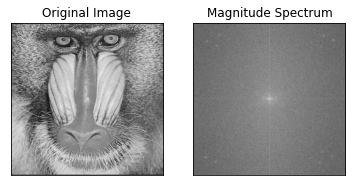

In [14]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

In [16]:
rows, cols = img.shape
center_x, center_y = rows // 2, cols // 2

In [17]:
r1 = int(input("Enter with the value of r1: "))
r2= int(input("Enter with the value of r2: "))

mask = np.zeros((rows,cols),np.uint8)
mask[center_x - r1 : center_x + r1, center_y - r1 : center_y + r1] = 1
mask[center_x - r2 : center_x + r2, center_y - r2 : center_y + r2] = 0

In [18]:
fshift = fshift * mask

In [19]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_back)

In [20]:
Image.fromarray(img_filtered).convert('L').save(output_path + '/band-pass-' + str(r1) + '-' + str(r2) + '.png')